In [1]:
# Import some libs
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl as op

In [2]:
# read data
#df = pd.read_excel('data/5 - Muesli Project raw data.xlsx', skiprows=1) # remove first row

df_orders = pd.read_csv('data/5 - Muesli Project raw data - Orders.csv', skiprows=1)
df_campaigns = pd.read_csv('data/5 - Muesli Project raw data - Campaign Data.csv')
df_intern_data = pd.read_csv('data/5 - Muesli Project raw data - InternData Study.csv')
df_process_data = pd.read_csv('data/5 - Muesli Project raw data - Order Process Data.csv')

#df_process_data.head(20)

In [3]:
# clean up data - replace ' ' with '_'

cols = df_orders.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
df_orders.columns = cols

cols = df_campaigns.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
df_campaigns.columns = cols

cols = df_intern_data.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
df_intern_data.columns = cols

cols = df_process_data.columns.tolist()
cols = [col.replace(' ', '_') for col in cols]
df_process_data.columns = cols

#df_process_data.head(20)


In [4]:
# clean up - data - convert date string to datetime obj.

df_orders['Order_Date'] = pd.to_datetime(df_orders['Order_Date'], dayfirst=True, format="%d/%m/%y", infer_datetime_format=True)

df_campaigns['Arrival_Scan_Date'] = pd.to_datetime(df_campaigns['Arrival_Scan_Date'], dayfirst=True, format="%d/%m/%y", infer_datetime_format=True)

df_intern_data['Ready_to_Ship_Date'] = pd.to_datetime(df_intern_data['Ready_to_Ship_Date'], dayfirst=True, format="%d/%m/%y", infer_datetime_format=True)
df_intern_data['Pickup_Date'] = pd.to_datetime(df_intern_data['Pickup_Date'], dayfirst=True, format="%d/%m/%y", infer_datetime_format=True)

df_process_data['Order_Date'] = pd.to_datetime(df_process_data['Order_Date'], dayfirst=True, format="%d/%m/%y", infer_datetime_format=True)
df_process_data['On_Truck_Scan_Date'] = pd.to_datetime(df_process_data['On_Truck_Scan_Date'], dayfirst=True, format="%d/%m/%y", infer_datetime_format=True)

#df_process_data.head(20)

In [5]:
# find duplicates and remove

df_orders.drop(['Index'], axis=1, inplace=True)
df_orders.drop_duplicates(inplace=True)
#df_orders.duplicated().value_counts()

df_intern_data.drop_duplicates(inplace=True) 
#df_intern_data.duplicated().value_counts()

df_process_data.drop(['Row_ID'], axis=1, inplace=True)
df_process_data.drop_duplicates(inplace=True)
#df_process_data.duplicated().value_counts()

In [6]:
df_orders.head()
df_process = df_orders[['Order_ID', 'Order_Date']]



In [7]:
df_process.head()

,Order_ID,Order_Date
0,CA-2019-121755,2019-01-16
1,CA-2019-118255,2019-03-11
2,CA-2019-169194,2019-06-20
3,CA-2019-111682,2019-06-17
4,CA-2018-135545,2018-11-24


In [8]:

df_process.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9993 entries, 0 to 9993
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order_ID    9993 non-null   object        
 1   Order_Date  9993 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 234.2+ KB


In [9]:
df_intern_data.head()

,Order_ID,Ready_to_Ship_Date,Pickup_Date
0,CA-2019-116540,2019-09-02,2019-09-03
2,CA-2019-129847,2019-09-04,2019-09-04
3,CA-2019-129630,2019-09-04,2019-09-04
4,CA-2019-106278,2019-09-05,2019-09-06
5,CA-2019-158099,2019-09-05,2019-09-06


In [10]:
#merge all dates to one dataframe
df_process = pd.merge(
    pd.DataFrame(df_process),
    pd.DataFrame(df_intern_data[["Order_ID", "Ready_to_Ship_Date", "Pickup_Date"]]),
    on='Order_ID',
    how='left')
df_process.head(30)

,Order_ID,Order_Date,Ready_to_Ship_Date,Pickup_Date
0,CA-2019-121755,2019-01-16,NaT,NaT
1,CA-2019-118255,2019-03-11,NaT,NaT
2,CA-2019-169194,2019-06-20,NaT,NaT
3,CA-2019-111682,2019-06-17,NaT,NaT
4,CA-2018-135545,2018-11-24,NaT,NaT
5,CA-2020-155558,2020-10-26,NaT,NaT
6,CA-2019-158568,2019-08-29,NaT,NaT
7,US-2018-156867,2018-11-13,NaT,NaT
8,CA-2020-119004,2020-11-23,2020-11-30,2020-12-02
9,CA-2018-129476,2018-10-15,NaT,NaT


In [11]:
df_process = pd.merge(
    pd.DataFrame(df_process),
    pd.DataFrame(df_process_data[["Order_ID", "On_Truck_Scan_Date", "Ship_Mode"]]),
    on='Order_ID',
    how='left')
df_process.head(30)

,Order_ID,Order_Date,Ready_to_Ship_Date,Pickup_Date,On_Truck_Scan_Date,Ship_Mode
0,CA-2019-121755,2019-01-16,NaT,NaT,2019-01-23,Standard Processing
1,CA-2019-118255,2019-03-11,NaT,NaT,2019-03-13,Express
2,CA-2019-169194,2019-06-20,NaT,NaT,2019-06-26,Standard Processing
3,CA-2019-111682,2019-06-17,NaT,NaT,2019-06-19,Express
4,CA-2018-135545,2018-11-24,NaT,NaT,NaT,NaN
5,CA-2020-155558,2020-10-26,NaT,NaT,2020-11-04,Standard Processing
6,CA-2019-158568,2019-08-29,NaT,NaT,2019-09-04,Standard Processing
7,US-2018-156867,2018-11-13,NaT,NaT,NaT,NaN
8,CA-2020-119004,2020-11-23,2020-11-30,2020-12-02,2020-12-02,Standard Processing
9,CA-2018-129476,2018-10-15,NaT,NaT,NaT,NaN


In [12]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9994
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order_ID            9995 non-null   object        
 1   Order_Date          9995 non-null   datetime64[ns]
 2   Ready_to_Ship_Date  418 non-null    datetime64[ns]
 3   Pickup_Date         418 non-null    datetime64[ns]
 4   On_Truck_Scan_Date  5901 non-null   datetime64[ns]
 5   Ship_Mode           5901 non-null   object        
dtypes: datetime64[ns](4), object(2)
memory usage: 546.6+ KB


In [13]:
df_process = pd.merge(
    pd.DataFrame(df_process),
    pd.DataFrame(df_campaigns[["Order_ID", "Arrival_Scan_Date"]]),
    on='Order_ID',
    how='left')
df_process.head(30)

,Order_ID,Order_Date,Ready_to_Ship_Date,Pickup_Date,On_Truck_Scan_Date,Ship_Mode,Arrival_Scan_Date
0,CA-2019-121755,2019-01-16,NaT,NaT,2019-01-23,Standard Processing,NaT
1,CA-2019-118255,2019-03-11,NaT,NaT,2019-03-13,Express,NaT
2,CA-2019-169194,2019-06-20,NaT,NaT,2019-06-26,Standard Processing,NaT
3,CA-2019-111682,2019-06-17,NaT,NaT,2019-06-19,Express,NaT
4,CA-2018-135545,2018-11-24,NaT,NaT,NaT,NaN,NaT
5,CA-2020-155558,2020-10-26,NaT,NaT,2020-11-04,Standard Processing,NaT
6,CA-2019-158568,2019-08-29,NaT,NaT,2019-09-04,Standard Processing,NaT
7,US-2018-156867,2018-11-13,NaT,NaT,NaT,NaN,NaT
8,CA-2020-119004,2020-11-23,2020-11-30,2020-12-02,2020-12-02,Standard Processing,NaT
9,CA-2018-129476,2018-10-15,NaT,NaT,NaT,NaN,NaT


In [14]:
df_process.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9994
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order_ID            9995 non-null   object        
 1   Order_Date          9995 non-null   datetime64[ns]
 2   Ready_to_Ship_Date  418 non-null    datetime64[ns]
 3   Pickup_Date         418 non-null    datetime64[ns]
 4   On_Truck_Scan_Date  5901 non-null   datetime64[ns]
 5   Ship_Mode           5901 non-null   object        
 6   Arrival_Scan_Date   668 non-null    datetime64[ns]
dtypes: datetime64[ns](5), object(2)
memory usage: 624.7+ KB


In [15]:
#Calculate durations between each dates and add them to our new dataframe

df_process['Order_Ship_Duration'] =  df_process['Ready_to_Ship_Date'] - df_process['Order_Date']
df_process['Ship_Pickup_Duration'] =  df_process['Pickup_Date'] - df_process['Ready_to_Ship_Date']
df_process['Pickup_Truck_Duration'] =  df_process['On_Truck_Scan_Date'] - df_process['Pickup_Date']
df_process['Truck_Arrival_Duration'] =  df_process['Arrival_Scan_Date'] - df_process['On_Truck_Scan_Date']

df_process.head(30)


,Order_ID,Order_Date,Ready_to_Ship_Date,Pickup_Date,On_Truck_Scan_Date,Ship_Mode,Arrival_Scan_Date,Order_Ship_Duration,Ship_Pickup_Duration,Pickup_Truck_Duration,Truck_Arrival_Duration
0,CA-2019-121755,2019-01-16,NaT,NaT,2019-01-23,Standard Processing,NaT,NaT,NaT,NaT,NaT
1,CA-2019-118255,2019-03-11,NaT,NaT,2019-03-13,Express,NaT,NaT,NaT,NaT,NaT
2,CA-2019-169194,2019-06-20,NaT,NaT,2019-06-26,Standard Processing,NaT,NaT,NaT,NaT,NaT
3,CA-2019-111682,2019-06-17,NaT,NaT,2019-06-19,Express,NaT,NaT,NaT,NaT,NaT
4,CA-2018-135545,2018-11-24,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT
5,CA-2020-155558,2020-10-26,NaT,NaT,2020-11-04,Standard Processing,NaT,NaT,NaT,NaT,NaT
6,CA-2019-158568,2019-08-29,NaT,NaT,2019-09-04,Standard Processing,NaT,NaT,NaT,NaT,NaT
7,US-2018-156867,2018-11-13,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT
8,CA-2020-119004,2020-11-23,2020-11-30,2020-12-02,2020-12-02,Standard Processing,NaT,7 days,2 days,0 days,NaT
9,CA-2018-129476,2018-10-15,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT


In [16]:
df_process.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9994
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Order_ID                9995 non-null   object         
 1   Order_Date              9995 non-null   datetime64[ns] 
 2   Ready_to_Ship_Date      418 non-null    datetime64[ns] 
 3   Pickup_Date             418 non-null    datetime64[ns] 
 4   On_Truck_Scan_Date      5901 non-null   datetime64[ns] 
 5   Ship_Mode               5901 non-null   object         
 6   Arrival_Scan_Date       668 non-null    datetime64[ns] 
 7   Order_Ship_Duration     418 non-null    timedelta64[ns]
 8   Ship_Pickup_Duration    418 non-null    timedelta64[ns]
 9   Pickup_Truck_Duration   418 non-null    timedelta64[ns]
 10  Truck_Arrival_Duration  668 non-null    timedelta64[ns]
dtypes: datetime64[ns](5), object(2), timedelta64[ns](4)
memory usage: 937.0+ KB


In [17]:
#Now we look at the duration between order date and the on truck scan date which we consider as "Warehouse Processing"
df_process['Order_Truck_Duration'] =  df_process['On_Truck_Scan_Date'] - df_process['Order_Date']
df_process

,Order_ID,Order_Date,Ready_to_Ship_Date,Pickup_Date,On_Truck_Scan_Date,Ship_Mode,Arrival_Scan_Date,Order_Ship_Duration,Ship_Pickup_Duration,Pickup_Truck_Duration,Truck_Arrival_Duration,Order_Truck_Duration
0,CA-2019-121755,2019-01-16,NaT,NaT,2019-01-23,Standard Processing,NaT,NaT,NaT,NaT,NaT,7 days
1,CA-2019-118255,2019-03-11,NaT,NaT,2019-03-13,Express,NaT,NaT,NaT,NaT,NaT,2 days
2,CA-2019-169194,2019-06-20,NaT,NaT,2019-06-26,Standard Processing,NaT,NaT,NaT,NaT,NaT,6 days
3,CA-2019-111682,2019-06-17,NaT,NaT,2019-06-19,Express,NaT,NaT,NaT,NaT,NaT,2 days
4,CA-2018-135545,2018-11-24,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...
9990,US-2019-115441,2019-07-25,NaT,NaT,2019-07-31,Standard Processing,NaT,NaT,NaT,NaT,NaT,6 days
9991,US-2018-129007,2018-09-13,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT,NaT
9992,CA-2018-132388,2018-10-10,NaT,NaT,NaT,NaN,NaT,NaT,NaT,NaT,NaT,NaT
9993,CA-2019-149272,2019-03-15,NaT,NaT,2019-03-20,Standard Processing,NaT,NaT,NaT,NaT,NaT,5 days


In [18]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9995 entries, 0 to 9994
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Order_ID                9995 non-null   object         
 1   Order_Date              9995 non-null   datetime64[ns] 
 2   Ready_to_Ship_Date      418 non-null    datetime64[ns] 
 3   Pickup_Date             418 non-null    datetime64[ns] 
 4   On_Truck_Scan_Date      5901 non-null   datetime64[ns] 
 5   Ship_Mode               5901 non-null   object         
 6   Arrival_Scan_Date       668 non-null    datetime64[ns] 
 7   Order_Ship_Duration     418 non-null    timedelta64[ns]
 8   Ship_Pickup_Duration    418 non-null    timedelta64[ns]
 9   Pickup_Truck_Duration   418 non-null    timedelta64[ns]
 10  Truck_Arrival_Duration  668 non-null    timedelta64[ns]
 11  Order_Truck_Duration    5901 non-null   timedelta64[ns]
dtypes: datetime64[ns](5), object(2), t

In [19]:
#We get rid of the NaT values in our Order_Truck_Duration column

df_process.query("Order_Truck_Duration != 'NaT'", inplace=True)
df_process


,Order_ID,Order_Date,Ready_to_Ship_Date,Pickup_Date,On_Truck_Scan_Date,Ship_Mode,Arrival_Scan_Date,Order_Ship_Duration,Ship_Pickup_Duration,Pickup_Truck_Duration,Truck_Arrival_Duration,Order_Truck_Duration
0,CA-2019-121755,2019-01-16,NaT,NaT,2019-01-23,Standard Processing,NaT,NaT,NaT,NaT,NaT,7 days
1,CA-2019-118255,2019-03-11,NaT,NaT,2019-03-13,Express,NaT,NaT,NaT,NaT,NaT,2 days
2,CA-2019-169194,2019-06-20,NaT,NaT,2019-06-26,Standard Processing,NaT,NaT,NaT,NaT,NaT,6 days
3,CA-2019-111682,2019-06-17,NaT,NaT,2019-06-19,Express,NaT,NaT,NaT,NaT,NaT,2 days
5,CA-2020-155558,2020-10-26,NaT,NaT,2020-11-04,Standard Processing,NaT,NaT,NaT,NaT,NaT,9 days
...,...,...,...,...,...,...,...,...,...,...,...,...
9988,US-2019-125402,2019-09-25,NaT,NaT,2019-10-02,Standard Processing,NaT,NaT,NaT,NaT,NaT,7 days
9989,CA-2019-122581,2019-08-21,NaT,NaT,2019-08-28,Standard Processing,NaT,NaT,NaT,NaT,NaT,7 days
9990,US-2019-115441,2019-07-25,NaT,NaT,2019-07-31,Standard Processing,NaT,NaT,NaT,NaT,NaT,6 days
9993,CA-2019-149272,2019-03-15,NaT,NaT,2019-03-20,Standard Processing,NaT,NaT,NaT,NaT,NaT,5 days


In [20]:
df_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901 entries, 0 to 9994
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Order_ID                5901 non-null   object         
 1   Order_Date              5901 non-null   datetime64[ns] 
 2   Ready_to_Ship_Date      418 non-null    datetime64[ns] 
 3   Pickup_Date             418 non-null    datetime64[ns] 
 4   On_Truck_Scan_Date      5901 non-null   datetime64[ns] 
 5   Ship_Mode               5901 non-null   object         
 6   Arrival_Scan_Date       668 non-null    datetime64[ns] 
 7   Order_Ship_Duration     418 non-null    timedelta64[ns]
 8   Ship_Pickup_Duration    418 non-null    timedelta64[ns]
 9   Pickup_Truck_Duration   418 non-null    timedelta64[ns]
 10  Truck_Arrival_Duration  668 non-null    timedelta64[ns]
 11  Order_Truck_Duration    5901 non-null   timedelta64[ns]
dtypes: datetime64[ns](5), object(2), t

In [21]:
#We convert the days into integers and plot a boxplot

df_process['Order_Truck_Duration'] = df_process['Order_Truck_Duration'].dt.days.astype('int')



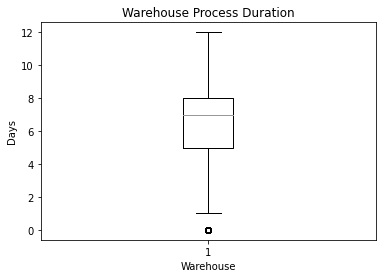

In [22]:
plt.boxplot(df_process['Order_Truck_Duration'])
plt.title('Warehouse Process Duration')
plt.xlabel('Warehouse')
plt.ylabel('Days')
plt.show()

In [23]:

df_process.describe()


,Order_Ship_Duration,Ship_Pickup_Duration,Pickup_Truck_Duration,Truck_Arrival_Duration,Order_Truck_Duration
count,418,418,418,668,5901.000000
mean,4 days 03:47:22.105263157,1 days 15:26:41.913875598,0 days 00:00:00,4 days 13:28:22.994011976,6.119641
std,1 days 22:47:56.623622708,0 days 23:12:24.026769113,0 days 00:00:00,1 days 05:00:33.077887896,2.509086
min,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00,1 days 00:00:00,0.000000
25%,3 days 00:00:00,1 days 00:00:00,0 days 00:00:00,4 days 00:00:00,5.000000
50%,5 days 00:00:00,2 days 00:00:00,0 days 00:00:00,5 days 00:00:00,7.000000
75%,6 days 00:00:00,2 days 00:00:00,0 days 00:00:00,5 days 00:00:00,8.000000
max,8 days 00:00:00,3 days 00:00:00,0 days 00:00:00,7 days 00:00:00,12.000000


In [24]:
#Now we want to see how long the delivery will take

#We look at Truck_Arrival_Duration column and we remove all NaT



df_process.query("Truck_Arrival_Duration != 'NaT'", inplace=True)
df_process

,Order_ID,Order_Date,Ready_to_Ship_Date,Pickup_Date,On_Truck_Scan_Date,Ship_Mode,Arrival_Scan_Date,Order_Ship_Duration,Ship_Pickup_Duration,Pickup_Truck_Duration,Truck_Arrival_Duration,Order_Truck_Duration
17,CA-2019-145625,2019-09-11,2019-09-17,2019-09-18,2019-09-18,Standard Processing,2019-09-23,6 days,1 days,0 days,5 days,7
24,CA-2019-162138,2019-04-23,NaT,NaT,2019-05-01,Standard Processing,2019-05-06,NaT,NaT,NaT,5 days,8
42,CA-2019-169166,2019-05-09,NaT,NaT,2019-05-15,Standard Processing,2019-05-20,NaT,NaT,NaT,5 days,6
61,CA-2020-131954,2020-01-21,NaT,NaT,2020-01-29,Standard Processing,2020-02-03,NaT,NaT,NaT,5 days,8
85,CA-2019-102981,2019-09-06,2019-09-09,2019-09-11,2019-09-11,Standard Processing,2019-09-16,3 days,2 days,0 days,5 days,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9917,CA-2019-113341,2019-11-25,NaT,NaT,2019-12-02,Standard Processing,2019-12-09,NaT,NaT,NaT,7 days,7
9926,CA-2019-162159,2019-09-16,NaT,NaT,2019-09-18,Express,2019-09-23,NaT,NaT,NaT,5 days,2
9937,CA-2019-106278,2019-09-02,2019-09-05,2019-09-06,2019-09-06,Standard Processing,2019-09-10,3 days,1 days,0 days,4 days,4
9938,CA-2019-143406,2019-09-26,NaT,NaT,2019-10-02,Standard Processing,2019-10-07,NaT,NaT,NaT,5 days,6


In [25]:
#We convert to integers
df_process['Truck_Arrival_Duration'] = df_process['Truck_Arrival_Duration'].dt.days.astype('int')
df_process



,Order_ID,Order_Date,Ready_to_Ship_Date,Pickup_Date,On_Truck_Scan_Date,Ship_Mode,Arrival_Scan_Date,Order_Ship_Duration,Ship_Pickup_Duration,Pickup_Truck_Duration,Truck_Arrival_Duration,Order_Truck_Duration
17,CA-2019-145625,2019-09-11,2019-09-17,2019-09-18,2019-09-18,Standard Processing,2019-09-23,6 days,1 days,0 days,5,7
24,CA-2019-162138,2019-04-23,NaT,NaT,2019-05-01,Standard Processing,2019-05-06,NaT,NaT,NaT,5,8
42,CA-2019-169166,2019-05-09,NaT,NaT,2019-05-15,Standard Processing,2019-05-20,NaT,NaT,NaT,5,6
61,CA-2020-131954,2020-01-21,NaT,NaT,2020-01-29,Standard Processing,2020-02-03,NaT,NaT,NaT,5,8
85,CA-2019-102981,2019-09-06,2019-09-09,2019-09-11,2019-09-11,Standard Processing,2019-09-16,3 days,2 days,0 days,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9917,CA-2019-113341,2019-11-25,NaT,NaT,2019-12-02,Standard Processing,2019-12-09,NaT,NaT,NaT,7,7
9926,CA-2019-162159,2019-09-16,NaT,NaT,2019-09-18,Express,2019-09-23,NaT,NaT,NaT,5,2
9937,CA-2019-106278,2019-09-02,2019-09-05,2019-09-06,2019-09-06,Standard Processing,2019-09-10,3 days,1 days,0 days,4,4
9938,CA-2019-143406,2019-09-26,NaT,NaT,2019-10-02,Standard Processing,2019-10-07,NaT,NaT,NaT,5,6


In [26]:
#we make a copy and start a query to look on only Express Ship Mode
df_express = df_process.copy()
df_express.query("Ship_Mode == 'Express'", inplace=True)
df_express


,Order_ID,Order_Date,Ready_to_Ship_Date,Pickup_Date,On_Truck_Scan_Date,Ship_Mode,Arrival_Scan_Date,Order_Ship_Duration,Ship_Pickup_Duration,Pickup_Truck_Duration,Truck_Arrival_Duration,Order_Truck_Duration
98,CA-2019-119186,2019-05-26,NaT,NaT,2019-05-28,Express,2019-05-31,NaT,NaT,NaT,3,2
104,CA-2019-124485,2019-11-24,NaT,NaT,2019-11-27,Express,2019-12-02,NaT,NaT,NaT,5,3
121,CA-2019-106530,2019-05-08,NaT,NaT,2019-05-08,Express,2019-05-13,NaT,NaT,NaT,5,0
274,CA-2020-125115,2020-04-10,NaT,NaT,2020-04-10,Express,2020-04-14,NaT,NaT,NaT,4,0
329,CA-2019-111493,2019-10-21,NaT,NaT,2019-10-23,Express,2019-10-28,NaT,NaT,NaT,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
9422,US-2019-150861,2019-12-03,NaT,NaT,2019-12-06,Express,2019-12-09,NaT,NaT,NaT,3,3
9453,CA-2019-119186,2019-05-26,NaT,NaT,2019-05-28,Express,2019-05-31,NaT,NaT,NaT,3,2
9644,CA-2019-118759,2019-11-14,NaT,NaT,2019-11-18,Express,2019-11-21,NaT,NaT,NaT,3,4
9866,CA-2020-166184,2020-03-24,NaT,NaT,2020-03-27,Express,2020-04-01,NaT,NaT,NaT,5,3


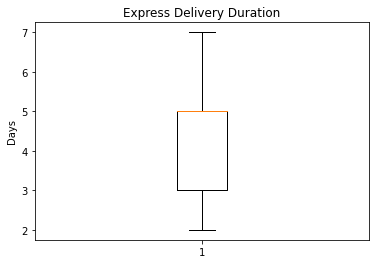

In [27]:
#plot it
plt.boxplot(df_express['Truck_Arrival_Duration'])
plt.title('Express Delivery Duration')
plt.ylabel('Days')
plt.show()

In [28]:
 #We do the same for standard ship mode
 
df_standard_processing = df_process.copy()
df_standard_processing.query("Ship_Mode == 'Standard Processing'", inplace=True)
df_standard_processing

,Order_ID,Order_Date,Ready_to_Ship_Date,Pickup_Date,On_Truck_Scan_Date,Ship_Mode,Arrival_Scan_Date,Order_Ship_Duration,Ship_Pickup_Duration,Pickup_Truck_Duration,Truck_Arrival_Duration,Order_Truck_Duration
17,CA-2019-145625,2019-09-11,2019-09-17,2019-09-18,2019-09-18,Standard Processing,2019-09-23,6 days,1 days,0 days,5,7
24,CA-2019-162138,2019-04-23,NaT,NaT,2019-05-01,Standard Processing,2019-05-06,NaT,NaT,NaT,5,8
42,CA-2019-169166,2019-05-09,NaT,NaT,2019-05-15,Standard Processing,2019-05-20,NaT,NaT,NaT,5,6
61,CA-2020-131954,2020-01-21,NaT,NaT,2020-01-29,Standard Processing,2020-02-03,NaT,NaT,NaT,5,8
85,CA-2019-102981,2019-09-06,2019-09-09,2019-09-11,2019-09-11,Standard Processing,2019-09-16,3 days,2 days,0 days,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
9914,CA-2019-156748,2019-11-30,NaT,NaT,2019-12-04,Standard Processing,2019-12-06,NaT,NaT,NaT,2,4
9917,CA-2019-113341,2019-11-25,NaT,NaT,2019-12-02,Standard Processing,2019-12-09,NaT,NaT,NaT,7,7
9937,CA-2019-106278,2019-09-02,2019-09-05,2019-09-06,2019-09-06,Standard Processing,2019-09-10,3 days,1 days,0 days,4,4
9938,CA-2019-143406,2019-09-26,NaT,NaT,2019-10-02,Standard Processing,2019-10-07,NaT,NaT,NaT,5,6


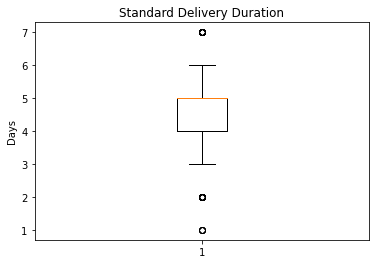

In [29]:
#plot it
plt.boxplot(df_standard_processing['Truck_Arrival_Duration'])
plt.title('Standard Delivery Duration')
plt.ylabel('Days')
plt.show()

In [30]:
df_express['Truck_Arrival_Duration'].describe().reset_index()

,index,Truck_Arrival_Duration
0,count,148.000000
1,mean,4.587838
2,std,1.409053
3,min,2.000000
4,25%,3.000000
5,50%,5.000000
6,75%,5.000000
7,max,7.000000


In [31]:
df_standard_processing['Truck_Arrival_Duration'].describe().reset_index()

,index,Truck_Arrival_Duration
0,count,520.000000
1,mean,4.553846
2,std,1.146741
3,min,1.000000
4,25%,4.000000
5,50%,5.000000
6,75%,5.000000
7,max,7.000000


In [32]:
#By comparing express and standard delivery, we can see that the duration is almost similar

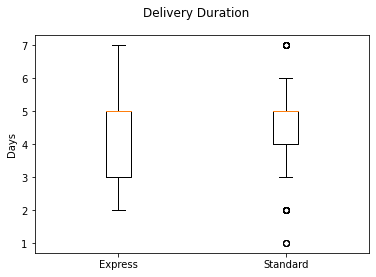

In [33]:
fig, ax = plt.subplots()
plt.boxplot([df_express['Truck_Arrival_Duration'], df_standard_processing['Truck_Arrival_Duration']])
ax.set_xticklabels(['Express', 'Standard'])
plt.suptitle('Delivery Duration')
plt.ylabel('Days')
plt.show()